In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import sklearn.linear_model
import sklearn.metrics

In [ ]:
# Download from URL
# url = "https://zenodo.org/record/7298798/files/daydatamat.csv"
# df = pd.read_csv(url,index_col=0)
# df

In [3]:
# Use local file 
path = '../data/daydatamat.csv'
df = pd.read_csv(path,index_col=0)
df

,Age,Day number,Bee unique ID,Cohort ID,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,...,Frame 2 - Num. crossings,Frame 3 - Num. crossings,Frame 4 - Num. crossings,Frame 5 - Num. crossings,Dispersion-minute avg.,Speed circadian coeff.,Time outside day5min,Num. outside trips day5min,Time outside day1min,Num. outside trips day1min
0,22.0,0,4.0,1.0,0.045395,0.212332,0.008444,0.0,0.733829,0.000775,...,40.0,0.0,20.0,46.0,116.373039,-0.509029,0.0,0.0,0.010417,11.0
1,22.0,0,6.0,1.0,0.036709,0.187211,0.048712,0.0,0.727368,0.021694,...,84.0,2.0,36.0,104.0,156.944835,-0.565287,0.0,0.0,0.004167,6.0
2,22.0,0,7.0,1.0,0.255499,0.357586,0.042301,0.0,0.344614,0.000000,...,71.0,0.0,83.0,32.0,152.676205,-0.624841,0.0,0.0,0.000000,0.0
3,22.0,0,9.0,1.0,0.199898,0.162891,0.035332,0.0,0.601880,0.000000,...,43.0,1.0,29.0,63.0,167.909343,-0.580714,0.0,0.0,0.000000,0.0
4,22.0,0,11.0,1.0,0.068730,0.160821,0.045910,0.0,0.724540,0.004808,...,55.0,4.0,61.0,45.0,140.118809,-0.418582,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202704,33.0,115,8095.0,29.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202705,33.0,115,8144.0,29.0,0.000000,0.371179,0.000000,0.0,0.628821,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202706,29.0,115,8277.0,30.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,1.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202707,29.0,115,8427.0,30.0,0.972222,0.027778,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0


In [4]:
# Take a subset for use in model fitting in these examples
dfsmall = df[::100]
dfsmall.shape

(2028, 38)

Types of Machine learning algorithms:
1) Supervised
2) Unsupervised
3) Semi-supervised
4) Reinforcement learning

Parts of the ML process:
- Representation
- Optimization (fitting)
-  Evaluation

# Supervised learing

## Regression

<Axes: xlabel='Median speed', ylabel='Dispersion (avg)'>

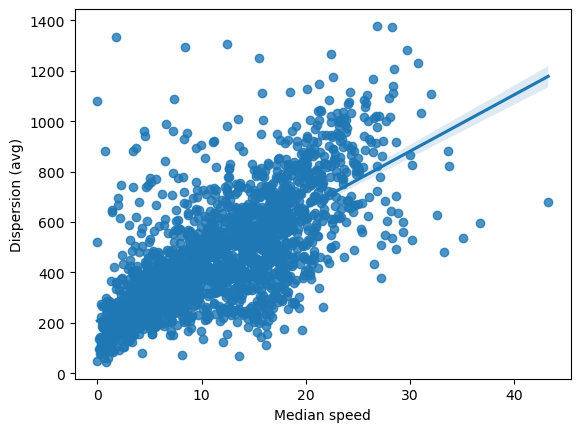

In [5]:
sns.regplot(x="Median speed",y="Dispersion (avg)",data=dfsmall,)

Now lets do a fit using sklearn and "machine-learning"/"model-fitting" syntax

In [4]:
reg = sklearn.linear_model.LinearRegression()
X = dfsmall[['Median speed']]
y = dfsmall[['Dispersion (avg)']]
#  use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
reg.fit(X,y)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[0.68620677]]
Intercept:  [-3.50076254e-16]


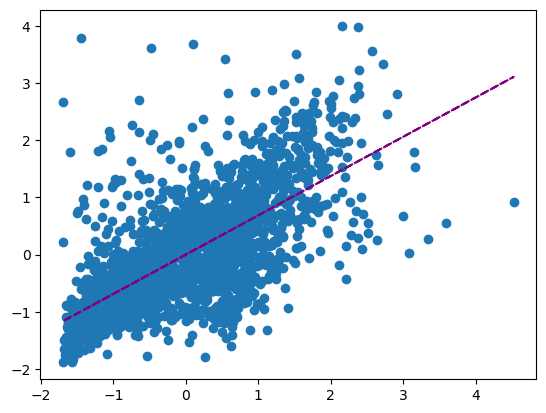

In [5]:
plt.scatter(X,y)
plt.plot(X, reg.coef_[0][0]*X + reg.intercept_[0], color='purple',linestyle='--')
plt.show()

1. **Representation**.
The equation for linear regression is 
$$y_i=b_0 + b_1x_i,$$
where $x_i$ is input data, $y_i^*$ is the output prediction, and $b_0,b_1$ are fit coefficients.  The actual output is $y_i$.
The mean square error is
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (b_0 + b_1 x_i))^2$$

2. **Optimization**  (also called "fitting", or "training")
Represent the input data as follows:  $X_i = (x_i^0,x_i^1)$  (so, then $\mathbf{X}$ has dimensions of $(n,2)$.  Considering also the coefficient vector $\beta=(b_0,b_1)$, the values of $\beta$ that minimize the MSE can be explicitly solved for using linear algebra.  The solution is:
$$\beta^\text{fit} = \left(\mathbf{X^T}\cdot\mathbf{X}\right)^{-1}\cdot\mathbf{X^T}\cdot \mathbf{y}$$
We can indeed calculate this and verify that it gives the same thing as using the sklearn package

In [6]:
Xtemp = np.reshape(np.array([X**0,X**1]),(2,len(X))).T
beta_fit = np.dot(np.dot(np.linalg.inv(np.dot(Xtemp.T,Xtemp)),Xtemp.T),np.reshape(y.values,len(y)))
print('beta_fit:',beta_fit)
print('sklearn:',(reg.intercept_,reg.coef_))

beta_fit: [-2.10552062e-16  6.86206772e-01]
sklearn: (array([-3.50076254e-16]), array([[0.68620677]]))


* In practice, its better to just use the built-in functions for fitting regression coefficients
* This illlustrates a key concept though:  the process of how to fit the coefficients
* For linear regression, the model is simple and has an analytical solution
* For more complicated models, there is no analytical solution and more involved methods must be used for optimization

3. **Evaluation** This is how to measure whether a not the model is a good one for the problem.  For regression-like models, common metrics used are:
* MSE: this is the value of the cost function that was minimized to fit the model
* $R^2$:  "R-squared", or coefficient of determination. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Has a range of 0 to 1 (although negative values are theoretically possible with, for example, a purposefully poor model fit), with higher values meaning a better fit.

In [7]:
y_pred = reg.predict(X)
print('MSE:',sklearn.metrics.mean_squared_error(y,y_pred))
print('r^2 score:',sklearn.metrics.r2_score(y,y_pred))
# note:  r^2 can also be computed from:   reg.score(X,y)

MSE: 0.5291202666713666
r^2 score: 0.4708797333286334


Without normalization, the MSE is not very meaningful.  In this example, if the input and output variables are normalized, then the MSE is equal to 1 minus r^2.  This relationship is specific to linear regression models though, and is not generalizeable

## Multiple regression

In [8]:
reg = sklearn.linear_model.LinearRegression()
X = dfsmall[['Honey','Brood care','Frame 5','Age']]
y = dfsmall[['Dispersion (avg)','Median speed']]
# use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
reg.fit(X,y)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[ 0.11166051  0.44090265  0.10083892  0.14116648]
 [ 0.07201548  0.57558702  0.31214053 -0.0018385 ]]
Intercept:  [-1.90498936e-16  2.48210567e-16]


In [9]:
y_pred = reg.predict(X)
print('r^2 score:',sklearn.metrics.r2_score(y,y_pred))
print('MSE:',sklearn.metrics.mean_squared_error(y,y_pred))

r^2 score: 0.24772860907894317
MSE: 0.7522713909210568


### *Q - Regression
Consider a regression model where we try to predict age, based on space use
Fit a regression with 'Frame 5' as the X variable, and 'Age' as the y variable.\
Then fit a multiple regression with ['Frame 5','Brood care','Honey'] as the X variables, keeping 'Age' as the y variable.\
Compare the performance of these fits in terms of R^2 and MSE.  Comparing coefficients, is the coefficient associated with 'Frame 5' the same, when the multiple regression is fit?  Would you say this is a "good" predictor of age?  Which variable is the strongest predictor of age?

Coefficients:  [[0.12911925]]
Intercept:  [5.96777206e-17]
MSE: 0.9833282190884569
r^2 score: 0.016671780911542866


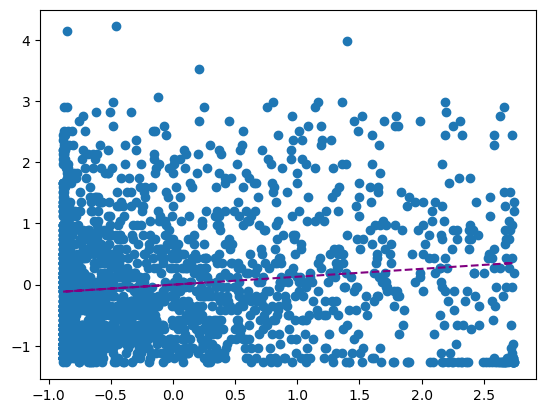

In [10]:
# Fit linear regression using the code snippet from above, and evaluate
reg = sklearn.linear_model.LinearRegression()
X = dfsmall[['Frame 5']]
y = dfsmall[['Age']]
#  use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
reg.fit(X,y)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)
y_pred = reg.predict(X)
print('MSE:',sklearn.metrics.mean_squared_error(y,y_pred))
print('r^2 score:',sklearn.metrics.r2_score(y,y_pred))

plt.scatter(X,y)
plt.plot(X, reg.coef_[0][0]*X + reg.intercept_[0], color='purple',linestyle='--')
plt.show()

In [11]:
# Fit multiple regression using the code snippet from above
reg = sklearn.linear_model.LinearRegression()
X = dfsmall[['Frame 5','Brood care','Honey']]
y = dfsmall[['Age']]
# use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
reg.fit(X,y)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

y_pred = reg.predict(X)
print('MSE:',sklearn.metrics.mean_squared_error(y,y_pred))
print('r^2 score:',sklearn.metrics.r2_score(y,y_pred))

Coefficients:  [[ 0.02472142 -0.50020001 -0.13098144]]
Intercept:  [4.45669258e-17]
MSE: 0.7561195749199752
r^2 score: 0.24388042508002472


- Frame 5 alone is not a good predictor of age.
- The multiple regression model does better, but is still a modest predictor (r^2=0.244).
- The coefficient for Frame 5 is 0.129 for the single regression case, and 0.0247 in the multiple case; it changes because in the multiple regression case the model is fit together; therefore the presence and choice of other quantities to include influences the fit.
- Out of these 3 quantities, Brood care relates to the most strongly to age.  This is seen by the highest absolute value of the fit coefficient (-0.5)

# Classification

**Representation**
* Different models we'll look at here: Logistic regression, random forest, decision tree, state vector machine

**Optimization**
* Other than special cases, numerical optimization/minimization routines are used.  For example, gradient descent, Newton's method, and others.

**Evaluation**
* Confusion matrix:  True positive, false positive, true negative, false negative (and generalization)

Here's an introductory description of these different classifier models:

<font size="5">1. Logistic Regression: </font>

**Overview:**
Logistic Regression is a linear model used for binary and multiclass classification problems. Despite its name, it's a classification algorithm, not a regression one. It models the probability of an instance belonging to a particular class using the logistic function.

**Key Points:**
- Suitable for binary and multiclass classification.
- Output is transformed using the logistic function to provide probabilities.
- Parameters are learned using optimization techniques like gradient descent.
- Interpretable coefficients indicate the impact of features on the prediction.

<font size="5">2. Decision Tree: </font>

**Overview:**
A Decision Tree is a non-linear model used for both classification and regression tasks. It makes decisions based on a series of questions and splits the data into subsets until a decision is reached.

**Key Points:**
- Hierarchical structure of nodes, branches, and leaves.
- Decision-making process based on feature thresholds.
- Prone to overfitting, but techniques like pruning can be applied.
- Visual representation makes it easy to interpret.

<font size="5">3. Random Forest:</font>

**Overview:**
Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Key Points:**
- Ensemble of decision trees improves accuracy and reduces overfitting.
- Each tree is trained on a random subset of features and data points.
- Robust to outliers and noise.
- Provides feature importance scores.

<font size="5">4. Support Vector Machine (SVM): </font>

**Overview:**
Support Vector Machine is a powerful and versatile supervised learning algorithm used for classification and regression tasks. It works by finding a hyperplane that best separates the classes in the feature space.

**Key Points:**
- Effective in high-dimensional spaces.
- Kernel trick allows handling non-linear decision boundaries.
- Margin maximization ensures robust generalization.
- Can be used for both binary and multiclass classification.

<font size="5">Brief Comparison:</font>

- **Interpretability:**
  - Logistic Regression: Coefficients indicate feature impact.
  - Decision Tree: Easily interpretable with visual representation.
  - Random Forest: Provides feature importance scores.
  - SVM: Decision boundaries may be less interpretable.

- **Handling Non-linearity:**
  - Logistic Regression: Assumes linear relationship between features.
  - Decision Tree: Captures non-linear relationships naturally.
  - Random Forest: Aggregates non-linearities from multiple trees.
  - SVM: Uses kernel trick to handle non-linear decision boundaries.

<font size="5">Evaluation metrics</font>

*from CognitiveClass.ai*
Note that all of these are based on the confusion matrix

- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)
  
- __F1 score:__
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

- __Accuracy:__  the average fraction predicted correctly.  

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [13]:
# cohorts 8 and 10 are honey bee drones (male reproductives)
# create a column with true/false for whether the bee is a drone
df_classify = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_classify['IsDrone'] = df_classify['Cohort ID'].isin([8,10])

In [14]:
# define the input matrix X and the output prediction y.  The input matrix uses a selection of columns from the data
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics]
# give y text labels, because then it will be easier to remember what is what
y = np.tile('Worker',len(X))
y[df_classify['IsDrone']] = 'Drone'

In [15]:
# fit different classifier models:  Logistic regression, random forest, decision tree, state vector machine
clf = LogisticRegression(class_weight='balanced').fit(X,y)
clf_rf = RandomForestClassifier(n_estimators=2,max_depth=3,class_weight='balanced').fit(X,y)
clf_dt = DecisionTreeClassifier(max_depth=3,class_weight='balanced').fit(X,y)
clf_svm = svm.SVC(kernel='rbf').fit(X, y) 

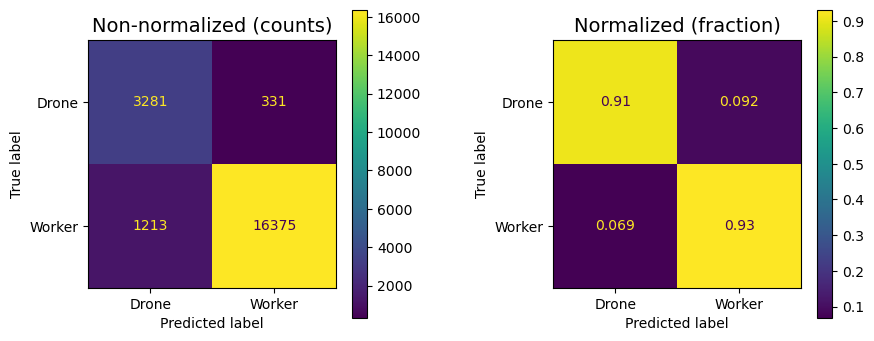

In [16]:
# example the predictions of the logistic regression classifier
predictions = clf.predict(X)

f,ax = plt.subplots(1,2,figsize=(10,4))

a=ax[0]
cm = sklearn.metrics.confusion_matrix(y, predictions)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_,)
disp.plot(ax=a)
a.set_title('Non-normalized (counts)',fontsize=14)

a=ax[1]
cm = sklearn.metrics.confusion_matrix(y, predictions,normalize='true')
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_,)
disp.plot(ax=a)
a.set_title('Normalized (fraction)',fontsize=14)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [17]:
# lets make a function that does this, so we can call it easier to compare models
def plotconfusionmatrix(clf,X,y):
    predictions = clf.predict(X)
    
    f,ax = plt.subplots(1,2,figsize=(10,4))
    
    a=ax[0]
    cm = sklearn.metrics.confusion_matrix(y, predictions)
    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_,)
    disp.plot(ax=a)
    a.set_title('Non-normalized (counts)',fontsize=14)
    
    a=ax[1]
    cm = sklearn.metrics.confusion_matrix(y, predictions,normalize='true')
    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_,)
    disp.plot(ax=a)
    a.set_title('Normalized (fraction)',fontsize=14)
    
    plt.subplots_adjust(wspace=0.5)

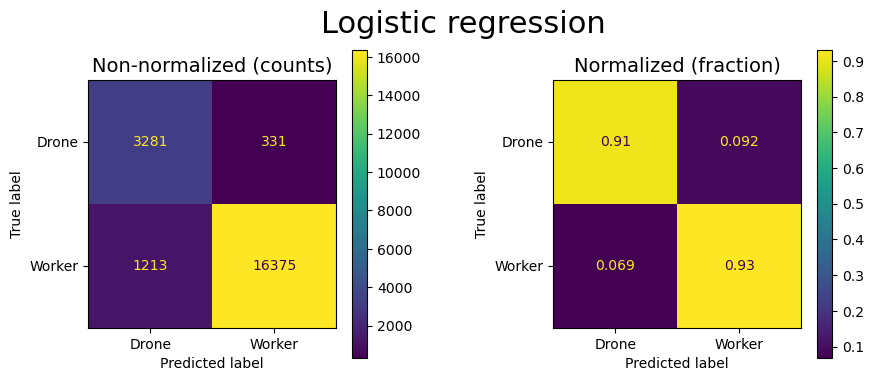

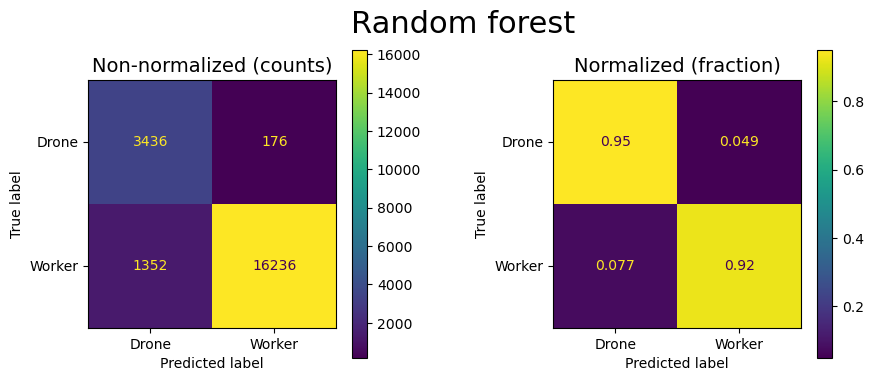

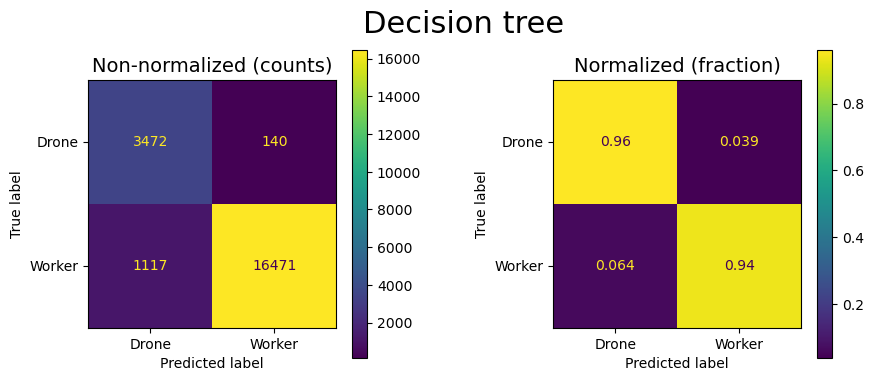

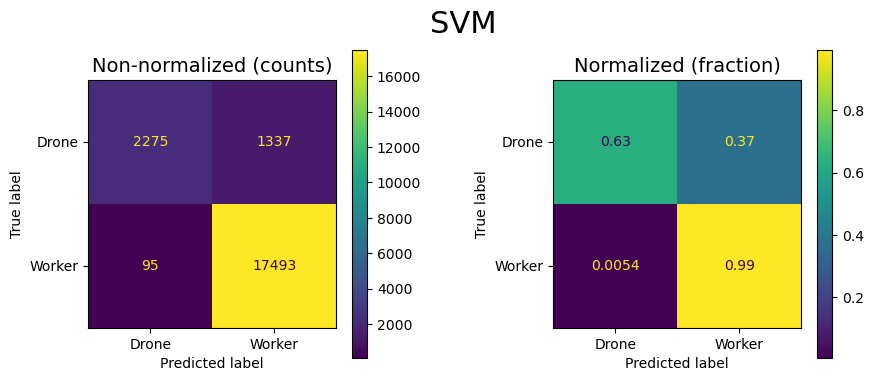

In [18]:
# loop through the different model fits, and create comparison plots
for c,modelname in zip([clf,clf_rf,clf_dt,clf_svm],['Logistic regression','Random forest','Decision tree','SVM']):
    plotconfusionmatrix(c,X,y)
    plt.suptitle(modelname,fontsize=22)
    plt.show()

In [19]:
# F1 Score

# first, use the LabelEncoder(), which simply assigns integer values to the different classes (they are currently stored as string)
# Then, fit the label encoder on the true labels and transform both true and predicted labels
label_encoder = sklearn.preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# Evaluate for the logistic regression model and print results
predictions = clf.predict(X)
predictions_enc = label_encoder.transform(predictions)

# Accuracy is another score:  the average fraction predicted correctly
print('Accuracy: ',sklearn.metrics.accuracy_score(y_enc,predictions_enc))
# precision and recall
print('Precision: ',sklearn.metrics.precision_score(y_enc,predictions_enc))
print('Recall: ',sklearn.metrics.recall_score(y_enc,predictions_enc))

# now, other metrics can be calulated
print('F1 score:',sklearn.metrics.f1_score(y_enc,predictions_enc))


Accuracy:  0.9271698113207547
Precision:  0.9801867592481743
Recall:  0.9310325221742097
F1 score: 0.954977547092786


Loop through the different models, and store the results for easy comparison

In [20]:
label_encoder = sklearn.preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)

models = [clf,clf_rf,clf_dt,clf_svm]
modelnames = ['Logistic regression','Random forest','Decision tree','SVM']
df_scores = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1'])

for c,modelname in zip(models,modelnames):
    predictions = c.predict(X)
    predictions_enc = label_encoder.transform(predictions)
    accuracy = sklearn.metrics.accuracy_score(y_enc,predictions_enc)
    precision = sklearn.metrics.precision_score(y_enc,predictions_enc)
    recall  = sklearn.metrics.recall_score(y_enc,predictions_enc)
    f1 = sklearn.metrics.f1_score(y_enc,predictions_enc)
    df_scores.loc[len(df_scores)] = [modelname,accuracy,precision,recall,f1]
df_scores

,Model,Accuracy,Precision,Recall,F1
0,Logistic regression,0.927170,0.980187,0.931033,0.954978
1,Random forest,0.927925,0.989276,0.923129,0.955059
2,Decision tree,0.940708,0.991572,0.936491,0.963245
3,SVM,0.932453,0.928996,0.994599,0.960679


## Feature importance

Feature importance can be assessed in each of these models.  Here is an overview

<font size=4>Logistic Regression</font>
- **Coefficients as Importance**: In Logistic Regression, the coefficients of the model (obtained via `model.coef_` in scikit-learn) represent the importance of each feature.
- **Interpretation**: A larger absolute value of a coefficient indicates a stronger influence of the corresponding feature on the model's predictions. The sign (positive/negative) of the coefficient indicates the direction of the influence.

<font size=4>Decision Tree</font>
- **Feature Importance Attribute**: Decision Trees in scikit-learn provide a `feature_importances_` attribute, which gives a score for each feature’s importance in making predictions.
- **Scaled Scores**: These importance scores are scaled such that they sum to 1. Each score represents the contribution of the feature to the decision-making process of the tree.

<font size=4>Random Forest</font>
- **Aggregated Feature Importance**: Similar to Decision Trees, Random Forests also use the `feature_importances_` attribute. This is an average of the feature importance scores across all trees in the forest.
- **Robustness**: Feature importance from a Random Forest is often considered more robust than from a single Decision Tree as it aggregates information over many trees.

<font size=4>SVM (Support Vector Machine)</font>
- **Linear SVM**: For linear SVM models (using a linear kernel), feature importance can be assessed by looking at the coefficients of the support vectors, similar to Logistic Regression.
- **Non-linear SVM**: Interpreting feature importances in non-linear SVMs is complex and often not feasible due to the kernel trick. The model's decision function depends on the dot product of input features and support vectors, which does not provide straightforward feature importance.

<font size=4>General Notes</font>
- **Contextual Interpretation**: The interpretation of feature importance can depend on the context and the specific preprocessing steps taken (like feature scaling).
- **Model-Specific**: Feature importance is model-specific and can vary significantly between different types of models.
- **Absolute vs. Relative Importance**: For Logistic Regression and Linear SVM, the coefficients represent the absolute importance assuming all features are on the same scale, whereas for Decision Trees and Random Forests, the importance scores are relative to each other.

Evaluate and print feature importance for Logistic Regression

In [23]:
modelname = 'Logistic regression'
# Convert to a DataFrame for easier visualization
feature_importances = pd.DataFrame({'feature': clf.feature_names_in_, 'coefficient': clf.coef_[0]})
# Sort by importance
feature_importances = feature_importances.sort_values(by='coefficient', ascending=False)
print('\n',modelname)
print(feature_importances)


 Logistic regression
                  feature  coefficient
5            Median speed     0.368567
2              Brood care     0.007096
6        Dispersion (avg)     0.001540
0       Num. observations    -0.000026
7  Exit distance (median)    -0.000484
1                   Honey    -0.003190
3                  Pollen    -0.004919
4                 Frame 5    -0.016857


Evaluate and print feature importance for Decision Tree and Random Forest

In [24]:
for c,modelname in zip([clf_dt,clf_rf],['Decision tree','Random forest']):
    # Convert to a DataFrame for easier visualization
    feature_importances = pd.DataFrame({'feature': c.feature_names_in_, 'importance': c.feature_importances_})
    # Sort by importance
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)
    print('\n',modelname)
    print(feature_importances)


 Decision tree
                  feature  importance
5            Median speed    0.855065
0       Num. observations    0.108827
2              Brood care    0.034861
1                   Honey    0.001247
3                  Pollen    0.000000
4                 Frame 5    0.000000
6        Dispersion (avg)    0.000000
7  Exit distance (median)    0.000000

 Random forest
                  feature  importance
5            Median speed    0.847241
2              Brood care    0.119985
6        Dispersion (avg)    0.028287
3                  Pollen    0.004128
1                   Honey    0.000360
0       Num. observations    0.000000
4                 Frame 5    0.000000
7  Exit distance (median)    0.000000


For SVM, we can only evaluate if we use a linear kernel.  Refit, and then evaluate.  (code takes awhile to run)

In [ ]:
modelname = 'SVM - linear'
clf_svm = svm.SVC(kernel='linear').fit(X, y) 
feature_importances = pd.DataFrame({'feature': clf_svm.feature_names_in_, 'coefficient': clf_svm.coef_[0]})
# Sort by importance
feature_importances = feature_importances.sort_values(by='coefficient', ascending=False)
print('\n',modelname)
print(feature_importances)

## Multiple classes (more than two)

In [14]:
# cohorts 8 and 10 are honey bee drones (male reproductives)
df_classify = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_classify['IsDrone'] = df_classify['Cohort ID'].isin([8,10])  # define this for visualization, but here we will use cohort id as the prediction classes

In [15]:
# define the input matrix X and the output (classes) list y
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics]
y = df_classify['Cohort ID']

In [16]:
# Fit different classifier models

# In the optionts, if class_weight is set to "balanced," the algorithm sets the weights inversely proportional to the class frequencies.  
# If the number of counts of different classes is very different, it is a good idea to use this option and compare.
clf = LogisticRegression(class_weight='balanced').fit(X,y)
clf_rf = RandomForestClassifier(n_estimators=2,max_depth=3,class_weight='balanced').fit(X,y)
clf_dt = DecisionTreeClassifier(max_depth=3,class_weight='balanced').fit(X,y)
clf_svm = svm.SVC(kernel='rbf').fit(X, y) 

/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


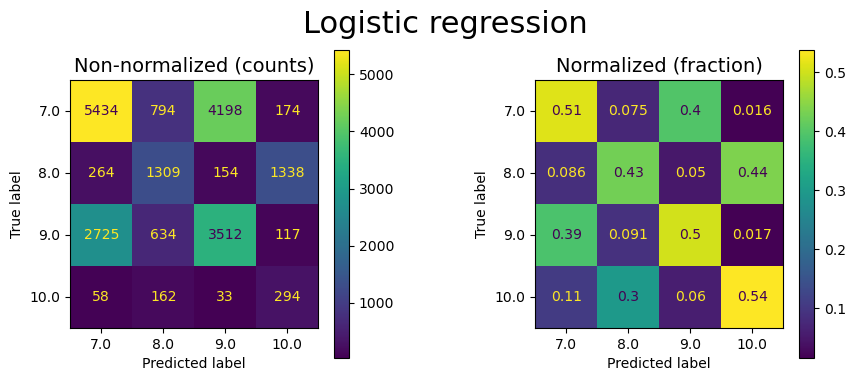

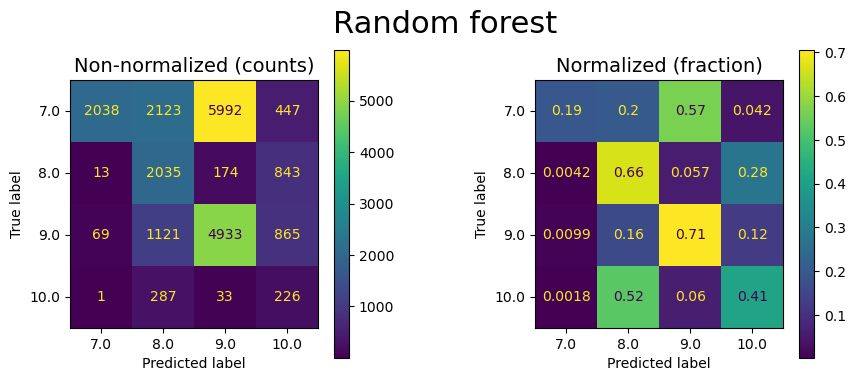

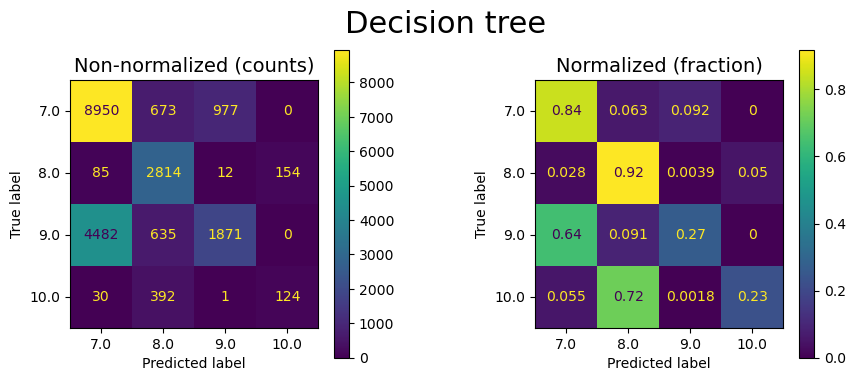

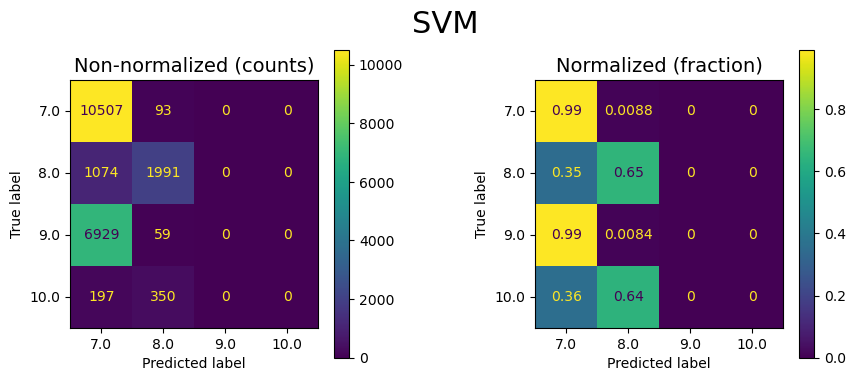

/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# apply the label encoder to get ordered integer values for the classes
label_encoder = sklearn.preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# make a list to loop through and compare the confusion matrix for different model fits
models = [clf,clf_rf,clf_dt,clf_svm]
modelnames = ['Logistic regression','Random forest','Decision tree','SVM']
df_scores = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1'])

for c,modelname in zip(models,modelnames):
    plotconfusionmatrix(c,X,y)  # note that this function was defined above in the previous section
    plt.suptitle(modelname,fontsize=22)
    plt.show()

    predictions = c.predict(X)
    predictions_enc = label_encoder.transform(predictions)
    accuracy = sklearn.metrics.accuracy_score(y_enc,predictions_enc)
    precision = sklearn.metrics.precision_score(y_enc,predictions_enc,average='weighted')
    recall  = sklearn.metrics.recall_score(y_enc,predictions_enc,average='weighted')
    f1 = sklearn.metrics.f1_score(y_enc,predictions_enc,average='weighted')
    df_scores.loc[len(df_scores)] = [modelname,accuracy,precision,recall,f1]

In [20]:
# scores for the different model fits
df_scores

,Model,Accuracy,Precision,Recall,F1
0,Logistic regression,0.497594,0.536181,0.497594,0.509936
1,Random forest,0.435472,0.681809,0.435472,0.411839
2,Decision tree,0.649009,0.647530,0.649009,0.610997
3,SVM,0.589528,0.396294,0.589528,0.462095


### *Q - Classification
The above example uses the following code to fit and evaluate the accuracy of the Logistic regression model.  This uses multiple inputs.\
- Instead of multiple inputs, how is the accuracy affected if each single metric is fit separately?
- How do the different accuracies of fit results compare with the feature importance inferred above?

Code from the example above

In [30]:
# cohorts 8 and 10 are honey bee drones (male reproductives)
# create a column with true/false for whether the bee is a drone
df_classify = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_classify['IsDrone'] = df_classify['Cohort ID'].isin([8,10])

# define the input matrix X and the output prediction y.  The input matrix uses a selection of columns from the data
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics]
# give y text labels, because then it will be easier to remember what is what
y = np.tile('Worker',len(X))
y[df_classify['IsDrone']] = 'Drone'

# fit the classifier model
clf = LogisticRegression(class_weight='balanced').fit(X,y)

# Evaluate accuracy
label_encoder = sklearn.preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)
# Evaluate for the logistic regression model and print results
predictions = clf.predict(X)
predictions_enc = label_encoder.transform(predictions)

# Accuracy is another score:  the average fraction predicted correctly
print('Accuracy: ',sklearn.metrics.accuracy_score(y_enc,predictions_enc))

Accuracy:  0.9271698113207547


Answer (with a loop)

In [32]:
# cohorts 8 and 10 are honey bee drones (male reproductives)
# create a column with true/false for whether the bee is a drone
df_classify = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_classify['IsDrone'] = df_classify['Cohort ID'].isin([8,10])

# define the input matrix X and the output prediction y.  The input matrix uses a selection of columns from the data
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
accuracies = []
for m in input_metrics:
    X = df_classify[[m]]
    # give y text labels, because then it will be easier to remember what is what
    y = np.tile('Worker',len(X))
    y[df_classify['IsDrone']] = 'Drone'
    
    # fit the classifier model
    clf = LogisticRegression(class_weight='balanced').fit(X,y)
    
    # Evaluate accuracy
    label_encoder = sklearn.preprocessing.LabelEncoder()
    y_enc = label_encoder.fit_transform(y)
    # Evaluate for the logistic regression model and print results
    predictions = clf.predict(X)
    predictions_enc = label_encoder.transform(predictions)
    
    # Accuracy is another score:  the average fraction predicted correctly
    accuracies.append(sklearn.metrics.accuracy_score(y_enc,predictions_enc))


pd.DataFrame({'metric':input_metrics,'accuracy':accuracies}).sort_values(by='accuracy', ascending=False)

,metric,accuracy
5,Median speed,0.888962
6,Dispersion (avg),0.755849
1,Honey,0.629481
2,Brood care,0.438632
4,Frame 5,0.406509
3,Pollen,0.345755
0,Num. observations,0.170377
7,Exit distance (median),0.170377


..
the Median speed still seems like the strongest predictor, but Dispersion is at a different relative ranking.  This is likely because Speed and Dispersion are correlated.

## Train/test division

We just fit each model above - we didn't think about the parameters or the possibility of overfitting!  for the decision tree and random forest classifiers, the max_depth is a key parameter, and we can check overfitting by using a train/test split

In [559]:
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics]

## use this for drone/worker classification
y = np.tile('Worker',len(X))
y[df_classify['IsDrone']] = 'Drone'

## use this for cohort ID classification
y = df_classify['Cohort ID']

In [21]:
from sklearn.model_selection import train_test_split

# create a train/test split using built-in scikit-learn function
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (16960, 8) (16960,)
Test set: (4240, 8) (4240,)


In [39]:
# define a function to calculate the scores on a classifier model more easily
def get_scores(c, X, y):
    """
    Calculate various classification scores for a fitted classifier model.

    Parameters:
    - c (classifier): A fitted classifier model.
    - X (array-like): Input data matrix.
    - y (array-like): Classes list.

    Returns:
    - scores (list): List containing accuracy, precision, recall, and F1 score.
    """

    # Encode the classes using LabelEncoder
    label_encoder = sklearn.preprocessing.LabelEncoder()
    y_enc = label_encoder.fit_transform(y)

    # Make predictions using the fitted model
    predictions = c.predict(X)
    predictions_enc = label_encoder.transform(predictions)

    # Choose 'binary' or 'weighted' averaging based on the number of unique classes
    average = 'binary' if len(np.unique(y_enc)) == 2 else 'weighted'

    # Calculate classification scores
    accuracy = sklearn.metrics.accuracy_score(y_enc, predictions_enc)
    precision = sklearn.metrics.precision_score(y_enc, predictions_enc, average='weighted', zero_division=np.nan)
    recall = sklearn.metrics.recall_score(y_enc, predictions_enc, average='weighted')
    f1 = sklearn.metrics.f1_score(y_enc, predictions_enc, average=average)

    # Return the scores as a list
    return [accuracy, precision, recall, f1]

In [26]:
# initialize a new dataframe to save the scores
df_scores = pd.DataFrame(columns=['Model','Depth','Accuracy','Precision','Recall','F1'])

In [27]:
# logistic regression
clf = LogisticRegression(class_weight='balanced').fit(x_train,y_train)
df_scores.loc[len(df_scores)] = ['Logistic regression',None] + get_scores(clf,x_test,y_test)
df_scores

/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Depth,Accuracy,Precision,Recall,F1
0,Logistic regression,None,0.490802,0.53651,0.490802,0.505248


In [28]:
# increase the depth of the tree and calculate the scores
# note that the fitting is done on the training set, and the evalulation on the test set
for depth in range(1,30,1):
    # fit models
    clf_rf = RandomForestClassifier(
        n_estimators=20,max_depth=depth,class_weight='balanced').fit(x_train,y_train)
    clf_dt = DecisionTreeClassifier(
        max_depth=depth,class_weight='balanced').fit(x_train,y_train)
    # calculate accuracy and save
    df_scores.loc[len(df_scores)] = ['RF',depth] + get_scores(clf_rf,x_test,y_test)
    df_scores.loc[len(df_scores)] = ['DT',depth] + get_scores(clf_dt,x_test,y_test)


In [29]:
df_scores.head()

,Model,Depth,Accuracy,Precision,Recall,F1
0,Logistic regression,None,0.490802,0.536510,0.490802,0.505248
1,RF,1,0.512264,0.532518,0.512264,0.513263
2,DT,1,0.443632,0.446467,0.443632,0.288991
3,RF,2,0.514623,0.716332,0.514623,0.484130
4,DT,2,0.549528,0.734504,0.549528,0.490494


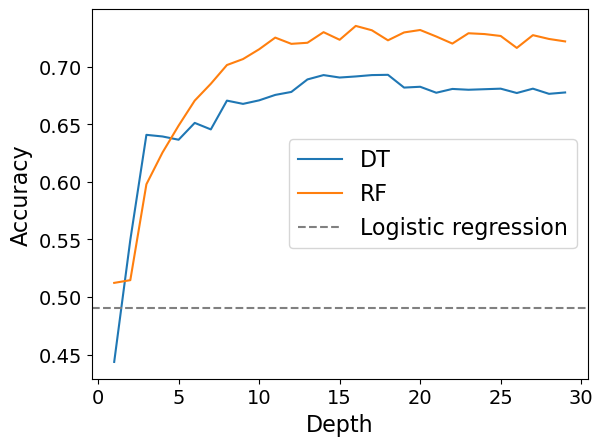

In [30]:
# plot the accuracy of the test set as a function of the depth of the tree
for modelname in ['DT','RF']:
    dfsel = df_scores[df_scores['Model']==modelname]
    plt.plot(dfsel['Depth'],dfsel['Accuracy'],label=modelname)
plt.axhline(df_scores.loc[df_scores['Model']=='Logistic regression']['Accuracy'].values,linestyle='--',c='gray',label='Logistic regression')
plt.xlabel('Depth',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.show()

For this example, it looks like it is not overfitting, because the accuracy plateaus and doesn't decrease

# Regression and Classification using deep learning models

What is deep learning, and how is it different from the above examples?\
--> A deep learning classifier consists of multiple layers of interconnected nodes, enabling it to automatically learn hierarchical representations of features. Deep learning models can capture complex patterns, and can perform well in tasks with high-dimensional data and intricate relationships.  However, the results and the importance of different features can be more difficult to interpret.\
\
The 3 core aspects of representation, fitting, and evaluation still apply. For deep learning models, the evaluation methods are the same.  But the model is much more complicated with many more parameters - so the representation and fitting steps are much more involved.\
\
Using sklearn, we can have a high-level interface for classification and regression

## Classification with neural network models

The Multi-Layer Perceptron (MLP) classifier is a type of artificial neural network designed for supervised learning tasks, particularly classification. \
\
MLP consists of an input layer, one or more hidden layers, and an output layer.
Nodes in each layer are interconnected, forming a densely connected network.

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [36]:
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics]

## use this for drone/worker classification
y = np.tile('Worker',len(X))
y[df_classify['IsDrone']] = 'Drone'

## use this for cohort ID classification
y = df_classify['Cohort ID']

# train and test split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (16960, 8) (16960,)
Test set: (4240, 8) (4240,)


In [37]:
# Create a Multi-Layer Perceptron (MLP) classifier with a single hidden layer of 100 notes
# - 'hidden_layer_sizes': Number of units in each hidden layer, here a single layer with 100 nodes.
# - 'solver': Optimization algorithm for weight updates, 'adam' is a popular choice.
# - 'activation': Activation function for hidden layer units, 'relu' (Rectified Linear Unit) is commonly used.
# - 'random_state': Seed for reproducibility of results.
clf_nn = MLPClassifier(hidden_layer_sizes=[100], solver='adam', activation='relu', random_state=0)

# Fit the MLP classifier to the training data (x_train and y_train)
clf_nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=[100], random_state=0)

In [40]:
# see the different scores for this classifier fit
get_scores(clf_nn,x_test,y_test)

[0.5860849056603774,
 0.5736321735529385,
 0.5860849056603774,
 0.4743186869294396]

What is the effect on different numbers of layers, different layer sizes, and difference activation functions?

In [41]:
# initialize a new dataframe to save the scores
df_scores = pd.DataFrame(columns=['Model','layer_size','num_layers','Accuracy','Precision','Recall','F1'])

# loop through different choices
for act_fn in ['logistic', 'tanh', 'relu']:
    for layer_size in [1,10,20]:
        for num_layers in [1,2,3]:
            print('fitting: ',(act_fn,layer_size,num_layers))
            clf_nn = MLPClassifier(hidden_layer_sizes = np.tile(layer_size,num_layers), solver='adam',
                                   activation=act_fn,
                         random_state = 0).fit(x_train, y_train)
            scores = get_scores(clf_nn,x_test,y_test)
            df_scores.loc[len(df_scores)] = ['clf-'+act_fn,layer_size,num_layers]+scores

fitting:  ('logistic', 1, 1)
fitting:  ('logistic', 1, 2)
fitting:  ('logistic', 1, 3)
fitting:  ('logistic', 10, 1)
fitting:  ('logistic', 10, 2)
fitting:  ('logistic', 10, 3)
fitting:  ('logistic', 20, 1)
fitting:  ('logistic', 20, 2)
fitting:  ('logistic', 20, 3)
fitting:  ('tanh', 1, 1)
fitting:  ('tanh', 1, 2)
fitting:  ('tanh', 1, 3)
fitting:  ('tanh', 10, 1)
fitting:  ('tanh', 10, 2)
fitting:  ('tanh', 10, 3)
fitting:  ('tanh', 20, 1)
fitting:  ('tanh', 20, 2)
fitting:  ('tanh', 20, 3)
fitting:  ('relu', 1, 1)
fitting:  ('relu', 1, 2)
fitting:  ('relu', 1, 3)
fitting:  ('relu', 10, 1)
fitting:  ('relu', 10, 2)
fitting:  ('relu', 10, 3)
fitting:  ('relu', 20, 1)
fitting:  ('relu', 20, 2)
fitting:  ('relu', 20, 3)


In [42]:
df_scores

,Model,layer_size,num_layers,Accuracy,Precision,Recall,F1
0,clf-logistic,1,1,0.496698,0.496698,0.496698,0.329671
1,clf-logistic,1,2,0.496698,0.496698,0.496698,0.329671
2,clf-logistic,1,3,0.496698,0.496698,0.496698,0.329671
3,clf-logistic,10,1,0.496698,0.496698,0.496698,0.329671
4,clf-logistic,10,2,0.496698,0.496698,0.496698,0.329671
5,clf-logistic,10,3,0.496698,0.496698,0.496698,0.329671
6,clf-logistic,20,1,0.498349,0.482065,0.498349,0.354787
7,clf-logistic,20,2,0.496698,0.496698,0.496698,0.329671
8,clf-logistic,20,3,0.496698,0.496698,0.496698,0.329671
9,clf-tanh,1,1,0.496698,0.496698,0.496698,0.329671


This classifier is not performing very well!

## Regression with neural networks

The MLPRegressor (Multi-Layer Perceptron Regressor) is a type of artificial neural network used for regression tasks. It shares similarities with the MLPClassifier but is designed to predict continuous numerical values rather than class labels. 

In [39]:
from sklearn.neural_network import MLPRegressor

In [40]:
# lets pick some values from the dataframe to create the input matrix X and the output matrix y
X = dfsmall[['Honey','Brood care','Frame 5','Age']]
y = dfsmall[['Dispersion (avg)','Median speed']]
# filter for nans
sel = np.logical_not(np.any(X.isna(),axis=1) | np.any(y.isna(),axis=1) )
X = X[sel]
y = y[sel]

# use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)

# train and test split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1622, 4) (1622, 2)
Test set: (406, 4) (406, 2)


In [41]:
# Create an MLPRegressor model with two hidden layers, each containing 20 neurons
# - 'hidden_layer_sizes': List specifying the number of neurons in each hidden layer, here two layers with 20 neurons each.
# - 'activation': Activation function for hidden layer neurons, 'tanh' (Hyperbolic Tangent) is chosen for non-linearity.
# - 'max_iter': Maximum number of iterations during optimization, set to 500 for convergence.
reg = MLPRegressor(hidden_layer_sizes=[20, 20], activation='tanh', max_iter=500)

# Fit the MLPRegressor model to the training data (x_train and y_train)
reg.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[20, 20], max_iter=500)

In [42]:
# evaluate prediction scores
y_pred = reg.predict(x_test)
print('r^2 score:',sklearn.metrics.r2_score(y_test,y_pred))
print('MSE:',sklearn.metrics.mean_squared_error(y_test,y_pred))

r^2 score: 0.5401554712956955
MSE: 0.5002261938516201


In [43]:
# lets again loop through and see the effects of parameters

# initialize a new dataframe to save the scores
df_scores = pd.DataFrame(columns=['Model','layer_size','num_layers','r2','MSE'])
# loop through difference choices
for act_fn in ['logistic', 'tanh', 'relu']:
    for layer_size in [1,10,20]:
        for num_layers in [1,2,3]:
            print('fitting: ',(act_fn,layer_size,num_layers))
            reg = MLPRegressor(hidden_layer_sizes=[20,20],
                               activation='tanh',max_iter=500).fit(x_train,y_train)
            y_pred = reg.predict(x_test)
            r2 = sklearn.metrics.r2_score(y_test,y_pred)
            mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
            df_scores.loc[len(df_scores)] = ['reg-'+act_fn,layer_size,num_layers,r2,mse]

fitting:  ('logistic', 1, 1)
fitting:  ('logistic', 1, 2)


/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


fitting:  ('logistic', 1, 3)
fitting:  ('logistic', 10, 1)
fitting:  ('logistic', 10, 2)
fitting:  ('logistic', 10, 3)
fitting:  ('logistic', 20, 1)
fitting:  ('logistic', 20, 2)
fitting:  ('logistic', 20, 3)
fitting:  ('tanh', 1, 1)
fitting:  ('tanh', 1, 2)
fitting:  ('tanh', 1, 3)
fitting:  ('tanh', 10, 1)
fitting:  ('tanh', 10, 2)
fitting:  ('tanh', 10, 3)


/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


fitting:  ('tanh', 20, 1)
fitting:  ('tanh', 20, 2)
fitting:  ('tanh', 20, 3)
fitting:  ('relu', 1, 1)
fitting:  ('relu', 1, 2)
fitting:  ('relu', 1, 3)
fitting:  ('relu', 10, 1)
fitting:  ('relu', 10, 2)
fitting:  ('relu', 10, 3)
fitting:  ('relu', 20, 1)
fitting:  ('relu', 20, 2)
fitting:  ('relu', 20, 3)


/Users/jacob/miniconda3/envs/data/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
df_scores

,Model,layer_size,num_layers,r2,MSE
0,reg-logistic,1,1,0.544116,0.495920
1,reg-logistic,1,2,0.532179,0.508764
2,reg-logistic,1,3,0.534260,0.506608
3,reg-logistic,10,1,0.533623,0.507387
4,reg-logistic,10,2,0.536525,0.504108
5,reg-logistic,10,3,0.530496,0.510845
6,reg-logistic,20,1,0.543621,0.496419
7,reg-logistic,20,2,0.532969,0.508133
8,reg-logistic,20,3,0.528447,0.512901
9,reg-tanh,1,1,0.541211,0.499077


In [45]:
# Fit a regular linear multiple regression model to compare with
reg = sklearn.linear_model.LinearRegression().fit(x_train,y_train)
y_pred = reg.predict(x_test)
print('r^2 score:',sklearn.metrics.r2_score(y_test,y_pred))
print('MSE:',sklearn.metrics.mean_squared_error(y_test,y_pred))

r^2 score: 0.25727470379460016
MSE: 0.8095982121076304


The nonlinear model does a lot better in predicting quantities!

### *Q Deep learning models - reflection.
Considering the different classification models (deep learning vs not), which would you choose for an application of data analysis?

# Unsupervised learning

Unsupervised learning seeks patterns in the data that have not previously been specified.  Two main types:
- Dimensionality reduction
- Clustering

## Dimensionality reduction:  Principal component analysis (PCA)

In [77]:
from sklearn.decomposition import PCA

In [78]:
# cohorts 8 and 10 are honey bee drones (male reproductives)
# create a subset dataframe just containing drones and workers (dw)
df_dw = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_dw['IsDrone'] = df_dw['Cohort ID'].isin([8,10])

In [79]:
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Frame 5','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_dw[input_metrics]
# take a subset for speeding up calculations in the examples
X = X[::3]
# standardize the columns of X
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

In [80]:
# Create a PCA object and fit it to the input data X
pca = PCA().fit(X)

# Retrieve the principal components (loadings) from the fitted PCA model
vh = pca.components_

# Transform the original data X into the new coordinate system defined by the principal components
u = pca.transform(X)

# Retrieve the explained variance ratio of each principal component
pcavar = pca.explained_variance_ratio_

In [81]:
# Create a DataFrame 'df_pca' from the transformed data 'u'
# - 'u': Transformed data from the PCA model, representing the principal components.
# - 'columns': Named as 'PCA 1', 'PCA 2', ..., corresponding to each principal component.
# - 'index': Preserves the original index from the input data 'X'.
df_pca = pd.DataFrame(u,columns=['PCA '+str(i+1) for i in range(u.shape[1])],index=X.index)
df_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
3307,1.093848,1.023846,-0.436583,-1.161281,0.588940,-0.367174,-0.249838,0.488591
3310,0.888787,-0.151154,0.592024,-1.316025,1.607883,-0.389745,-0.600052,0.599321
3313,-0.522685,0.275548,0.821951,-1.364112,0.078352,-0.096990,-0.765629,-0.475270
3316,1.891928,-0.609780,-1.385210,-1.237828,0.977052,0.524092,-0.268741,1.072085
3319,-0.490772,0.695151,0.706854,-1.292286,-0.259346,0.580711,-0.561248,0.127703


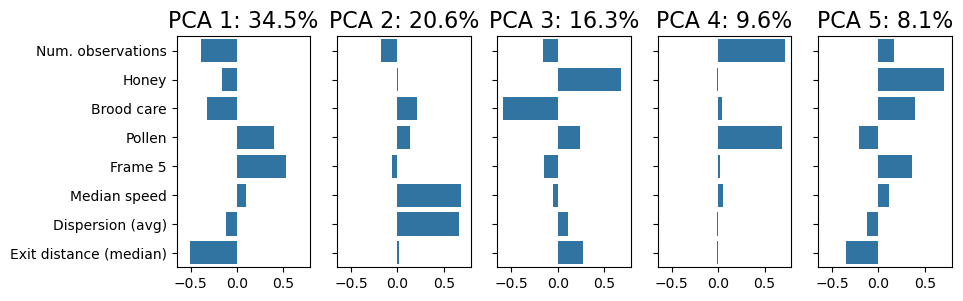

In [82]:
# visualize what the PCA components are using seaborn barplot, and show the respective fraction of variance explained of each
num_to_show = 5
f,ax = plt.subplots(1,num_to_show,sharex=True,sharey=True)
f.set_size_inches(2*num_to_show,3)
for i,a in enumerate(ax):
    sns.barplot(data=vh[i], orient="h",ax=a)
    a.set_title('PCA '+str(i+1)+': '+str(np.round(pcavar[i]*100,1))+'%',fontsize=16)
ax[0].set_yticks(range(len(X.columns)))
ax[0].set_yticklabels(X.columns)
plt.show()

<Axes: xlabel='PCA 1', ylabel='PCA 2'>

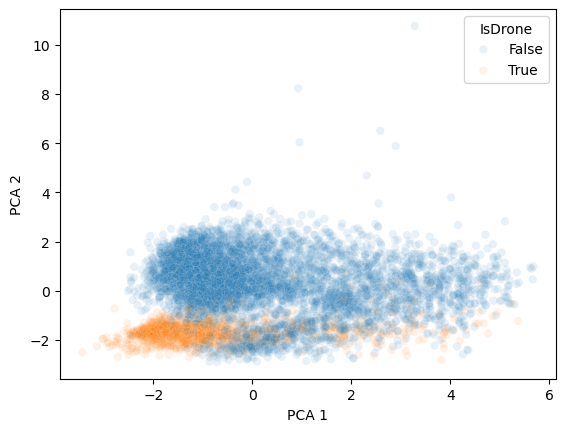

In [83]:
# visualize the projection onto the first two PCA axes.
sns.scatterplot(x='PCA 1',y='PCA 2',data=df_pca.join(df_dw),hue='IsDrone',alpha=0.1)

### *Q: PCA
If 'Frame 5' is removed from the inputs, how do the PCA vectors change?

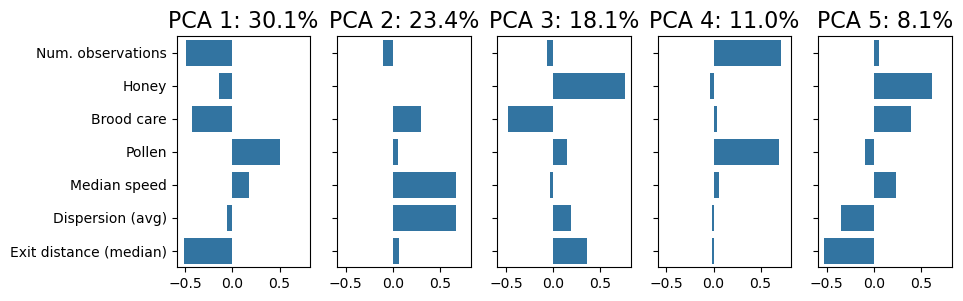

In [84]:
## copying the code from above, and removing 'Frame 5'
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen','Median speed','Dispersion (avg)', 'Exit distance (median)']
X = df_dw[input_metrics]
# take a subset for speeding up calculations in the examples
X = X[::3]
# standardize the columns of X
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

# Create a PCA object and fit it to the input data X
pca = PCA().fit(X)

# Retrieve the principal components (loadings) from the fitted PCA model
vh = pca.components_

# Transform the original data X into the new coordinate system defined by the principal components
u = pca.transform(X)

# Retrieve the explained variance ratio of each principal component
pcavar = pca.explained_variance_ratio_

# visualize what the PCA components are using seaborn barplot, and show the respective fraction of variance explained of each
num_to_show = 5
f,ax = plt.subplots(1,num_to_show,sharex=True,sharey=True)
f.set_size_inches(2*num_to_show,3)
for i,a in enumerate(ax):
    sns.barplot(data=vh[i], orient="h",ax=a)
    a.set_title('PCA '+str(i+1)+': '+str(np.round(pcavar[i]*100,1))+'%',fontsize=16)
ax[0].set_yticks(range(len(X.columns)))
ax[0].set_yticklabels(X.columns)
plt.show()

A: 
From visual inspection, the patterns don't change much.  However, PCA 1 now explains a lower fraction of the overall variance

## Dimensionality reduction with tSNE (t stochastic neighbor embedding)

In [60]:
from sklearn.manifold import TSNE

In [61]:
# Perform t-SNE dimensionality reduction on the input data 'X'
# - 'n_components': Number of dimensions in the embedded space, set to 2 for 2D visualization.
# - 'init': Initialization method for the optimization, using PCA for better convergence.
# - 'perplexity': Balance between preserving local and global structures, typically set between 5 and 50.
X_embedded = TSNE(n_components=2, init='pca', perplexity=30).fit_transform(X)

<Axes: xlabel='TSNE 1', ylabel='TSNE 2'>

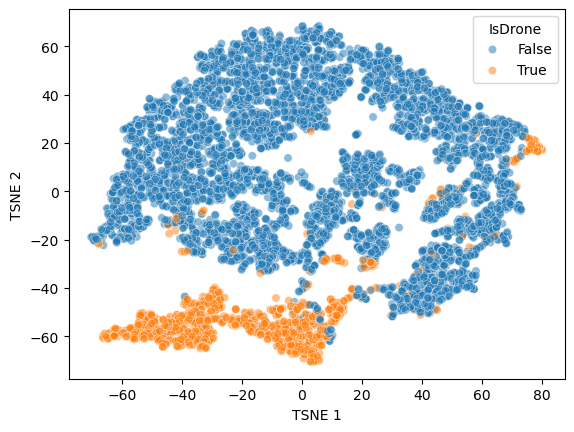

In [62]:
# visualize

# Create a DataFrame 'df_toplot' combining the t-SNE embedded data and additional features
# - 'X_embedded': 2D embedded data obtained from t-SNE.
# - 'columns': Labeled as 'TSNE 1' and 'TSNE 2' for the two dimensions of the embedded space.
# - 'index': Preserves the original index from the input data 'X'.
# - 'join(df_dw)': Joins additional features from DataFrame 'df_dw' to the t-SNE embedded data.
df_toplot = pd.DataFrame(X_embedded, columns=['TSNE 1', 'TSNE 2'], index=X.index).join(df_dw)

# Create a scatter plot to visualize the t-SNE representation
# - 'x=' and 'y=': Specify the columns for the x and y-axis, representing the t-SNE dimensions.
# - 'data=df_toplot': Data source for the scatter plot.
# - 'hue='IsDrone'': Color points based on the 'IsDrone' feature.
sns.scatterplot(x='TSNE 1',y='TSNE 2',data=df_toplot,hue='IsDrone',alpha=0.5)

## Clustering

https://scikit-learn.org/stable/modules/clustering.html

Here are three different clustering methods we'll compare:\
\
<font size="5">1. KMeans</font>

**Overview:**
- **Type:** Partitioning-based clustering.
- **Method:** Divides data into 'k' clusters based on similarity.
- **Objective:** Minimizes the sum of squared distances between data points and their cluster centroids.
- **Parameters:** Number of clusters 'k' needs to be specified.
- **Strengths:**
  - Simple and computationally efficient.
  - Works well for well-separated, spherical clusters.

<font size="5">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):</font>

**Overview:**
- **Type:** Density-based clustering.
- **Method:** Identifies clusters based on areas of high data point density.
- **Objective:** Forms clusters by connecting data points within a specified neighborhood density.
- **Parameters:** Epsilon (radius for defining neighborhood) and minimum points required to form a dense region.
- **Strengths:**
  - Can find clusters of arbitrary shapes.
  - Robust to noise and outliers.

<font size="5">3. AgglomerativeClustering:</font>

**Overview:**
- **Type:** Hierarchical clustering.
- **Method:** Builds a hierarchy of clusters by recursively merging or agglomerating data points.
- **Objective:** Creates a dendrogram, allowing the selection of the desired number of clusters.
- **Parameters:** Linkage method (e.g., ward, average, complete) and the number of clusters.
- **Strengths:**
  - Provides a hierarchical structure of clusters.
  - Suitable for datasets with nested or hierarchical structures.

In [65]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [66]:
n_clusters = 4  # need to specify this for kmeans and hierarchical clustering

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init='auto')
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(X)

# Hierarchical clustering (Agglomerative)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)

use PCA or tSNE embedding to visualize these

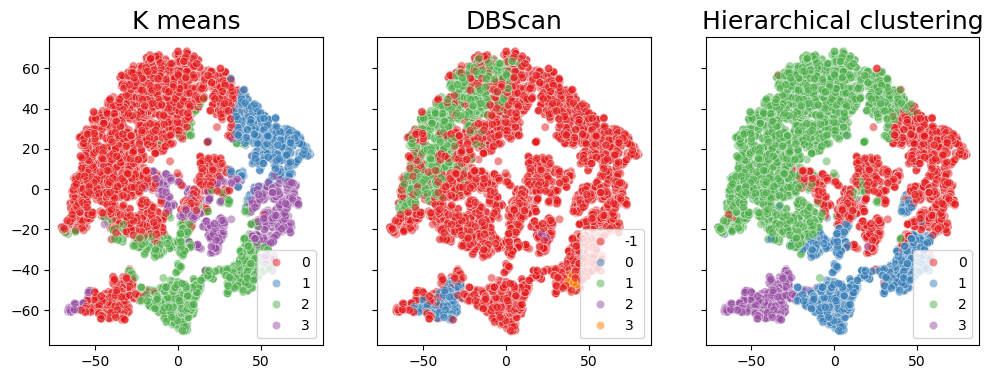

In [67]:
# x_toplot, y_toplot = df_pca[['PCA 1','PCA 2']].values.T  # use this to plot on first two PCA axes
x_toplot, y_toplot = X_embedded.T  # use this to plot with tSNE embedding

f,ax = plt.subplots(1,3,sharex=True,sharey=True)
f.set_size_inches(12,4)
# loop through the different clustering methods to plot results
for a,labels,title in zip(ax,[kmeans_labels,dbscan_labels,agg_labels],['K means','DBScan','Hierarchical clustering']):
    sns.scatterplot(x=x_toplot,y=y_toplot,hue=labels,alpha=0.5,ax=a,palette='Set1')
    a.set_title(title,fontsize=18)
plt.show()